In [36]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
train_set = pd.read_csv('/Users/monicasandramensah/Desktop/Capstone - Flu/training_set_features.csv')

In [4]:
train_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
train_set = train_set.fillna(0.0)

In [6]:
train_dum = pd.get_dummies(train_set, columns=['age_group', 'education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region', 'census_msa', 'employment_industry','employment_occupation'], drop_first=True)

In [7]:
train_dum.rename(columns={'age_group_65+ Years': 'age_group_65_Years_over', 
                          'age_group_55 - 64 Years':'age_group_55_64',
                          'age_group_45 - 54 Years':'age_group_45_54',
                          'age_group_35 - 44 Years':'age_group_35_44'}, inplace=True)

In [8]:
train_dum.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_35_44,age_group_45_54,age_group_55_64,age_group_65_Years_over,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,...,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
test_set = pd.read_csv('/Users/monicasandramensah/Desktop/Capstone - Flu/test_set_features.csv')

In [10]:
test_set = test_set.fillna(0.0)

In [11]:
test_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,0,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [12]:
test_dum = pd.get_dummies(test_set, columns=['age_group', 'education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region', 'census_msa', 'employment_industry','employment_occupation'], drop_first=True)


In [13]:
test_dum.rename(columns={'age_group_65+ Years': 'age_group_65_Years_over', 
                          'age_group_55 - 64 Years':'age_group_55_64',
                          'age_group_45 - 54 Years':'age_group_45_54',
                          'age_group_35 - 44 Years':'age_group_35_44'}, inplace=True)

In [14]:
train_set_labels = pd.read_csv('/Users/monicasandramensah/Desktop/Capstone - Flu/training_set_labels.csv')

In [15]:
train_set_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [16]:
test_dum.shape

(26708, 101)

In [17]:
train_dum.shape

(26707, 101)

In [18]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_dum,
    train_set_labels[['h1n1_vaccine', 'seasonal_vaccine']],
    test_size=0.33,
    shuffle=True,
    stratify=train_set_labels[['h1n1_vaccine', 'seasonal_vaccine']],
)

In [19]:
Y = train_set_labels

In [20]:
n_samples, n_features = train_dum.shape

In [21]:
n_outputs = Y.shape[1]

In [22]:
n_classes = 2

In [23]:
forest = RandomForestClassifier(random_state=1)

In [24]:
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [25]:
multi_target_forest.fit(X_train, y_train).predict(X_eval)

array([[0, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]])

In [26]:
probabilities = multi_target_forest.predict_proba(X_eval)
probabilities

[array([[0.95, 0.05],
        [0.78, 0.22],
        [0.63, 0.37],
        ...,
        [0.98, 0.02],
        [0.55, 0.45],
        [0.82, 0.18]]),
 array([[0.88, 0.12],
        [0.46, 0.54],
        [0.23, 0.77],
        ...,
        [0.92, 0.08],
        [0.38, 0.62],
        [0.89, 0.11]])]

In [27]:
print("test_probas[0].shape", probabilities[0].shape)
print("test_probas[1].shape", probabilities[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [34]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": probabilities[0][:, 1],
        "seasonal_vaccine": probabilities[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
12573,0.05,0.12
23254,0.22,0.54
18079,0.37,0.77
19244,0.08,0.85
4593,0.19,0.21


In [37]:
roc_auc_score(y_eval, y_preds)

0.8528825573662968

In [38]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plot

In [39]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

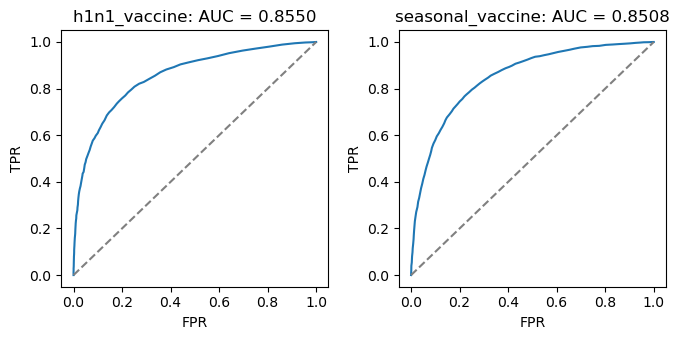

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [41]:
%%time 

multi_target_forest.fit(X_train, y_train)

CPU times: user 193 ms, sys: 321 ms, total: 515 ms
Wall time: 4.02 s


In [42]:
predictions_train = pd.DataFrame(multi_target_forest.predict(X_train), columns=y_train.columns, index=y_train.index)
predictions_eval = pd.DataFrame(multi_target_forest.predict(X_eval), columns=y_eval.columns, index=y_eval.index)

In [43]:
#No H1N1 /  No Seasonal
y_e = y_eval.apply(lambda x: np.allclose(x, np.array([0,0]))*1,axis=1)

In [44]:
#No H1N1 but had the Seasonal
y_e1 = y_eval.apply(lambda x: np.allclose(x, np.array([0,1]))*1,axis=1)

In [45]:
#Had H1N1 but no Seasonal
y_e2 = y_eval.apply(lambda x: np.allclose(x, np.array([1,0]))*1,axis=1)

In [46]:
#Had H1N1 and Seasonal
y_e3 = y_eval.apply(lambda x: np.allclose(x, np.array([1,1]))*1,axis=1)

In [47]:
#No H1N1 /  No Seasonal
y_p = predictions_eval.apply(lambda x: np.allclose(x, np.array([0,0]))*1,axis=1)

In [48]:
#No H1N1 but had the Seasonal
y_p1 = predictions_eval.apply(lambda x: np.allclose(x, np.array([0,1]))*1,axis=1)

In [49]:
#Had H1N1 but no Seasonal
y_p2 = predictions_eval.apply(lambda x: np.allclose(x, np.array([1,0]))*1,axis=1)

In [50]:
#No H1N1 but had the Seasonal
y_p3 = predictions_eval.apply(lambda x: np.allclose(x, np.array([1,0]))*1,axis=1)

In [60]:
#Where the evaluations as predictions match 
print(np.sum(y_e == y_p))
print(np.sum(y_e1 == y_p1))
print(np.sum(y_e2 == y_p2))
print(np.sum(y_e3 == y_p3))

6759
6586
8482
7240


In [52]:
np.sum((y_e == 1) & (y_p == 1))

3548

In [53]:
np.sum((y_e1 == 1) & (y_p1 == 1))

1663

In [54]:
np.sum((y_e2 == 1) & (y_p2 == 1))

21

In [55]:
np.sum((y_e3 == 1) & (y_p3 == 1))

14

In [56]:
np.sum((y_e == 0) & (y_p == 0))

3211

In [57]:
np.sum((y_e1 == 0) & (y_p1 == 0))

4923

In [58]:
np.sum((y_e2 == 0) & (y_p2 == 0))

8461

In [59]:
np.sum((y_e3 == 0) & (y_p3 == 0))

7226